# Visual Analytics : Assignment 1   
>#### <font color="#2196F3">Meghna Ramachandra Holla (B00812604) </font>
***

In [189]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import regex as re 
# !pip install regex


In [190]:
# Loading data from CSV file
def load_data():
    path_to_file = "C:/Users/Meghna/Documents/MACS/Term 3/Visual Analytics/Assignments/Assignment 1/dataset1_dirty.csv"
    data_set = pd.read_csv(path_to_file)
    return data_set

In [191]:
def age_preprocess(dataset):        
#     print(age.isnull().sum()) #checking total null values
#     print(np.isnan(age).sum()) #checking total nan values
#     print(age.isnull().values.any()) #check if there are any missing values at all
#     print((age.astype(str) != '?').all(axis=0)) #checking if there are '?' characters

    # Historgram for Age distribution before pre-processing, steps = 5
    numeric_histogram(dataset['age'], "Distribution plot of Age before Pre-processing",10)
        
    # Preprocessing steps
    #Checking for NaN values and replacing with zero
    if dataset['age'].isnull().sum() != 0 or np.isnan(dataset['age']).sum():
        dataset['age'].fillna(0)
    
    dataset['age'] = dataset['age'].replace(to_replace='?', value=0)
    dataset['age'] = abs(dataset['age'])
    dataset['age'] = dataset['age'].replace(to_replace=0, method='ffill')  
    
    
    # Historgram for Age distribution after pre-processing, steps = 5
#     plt.hist(age_data, bins = 5)
    numeric_histogram(dataset['age'], "Distribution plot of Age after Pre-processing",10)

    return (dataset)


In [192]:
def numeric_histogram(data, dist_title, interval):
    bin_values = np.arange(start=data.min(), stop=data.max(), step=interval)
    data.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.4, legend=True,title=dist_title)
    plt.show()

In [193]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/ ffill bfill backfill


In [194]:
def workclass_preprocess(dataset):
    workclass_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass before Pre-processing")

    dataset = pd.DataFrame(dataset) 
    dataset['workclass'] = dataset['workclass'].replace(to_replace=r"[- ]", value='',regex=True)
    work = {'(p|P)riv...':"Private",'[a-zA-Z]*(f|F)e........':"Federal-gov",'(s|S)elfempn?ot?..+':"Self-emp-not-inc",'(s|S)elfempi?.c':"Self-emp-inc",'(l|L)o......':"Local-gov",'(S|s)t......':"State-gov",'(W|w)ithoutpay':"Without-pay"}
    for key, value in work.items():
        dataset['workclass'] = dataset['workclass'].replace(to_replace=key, value=value,regex=True)
    dataset['workclass'] = dataset['workclass'].replace(to_replace='?', method='ffill')
    dataset['workclass'] = workclass_histogram(pd.DataFrame(dataset['workclass']), "Distribution plot of Workclass after Pre-processing")#mode because 'Private' workclass is the most frequent(exponentially), therefore this will not affect the distribution

    return(dataset)

In [195]:
def workclass_histogram(workclass, dist_title):
    workclass.groupby(workclass.columns[0])[workclass.columns[-1]].count().plot(kind='bar',figsize=[16,6]).set_title(dist_title,fontsize=30)#[12]
    plt.ylabel('Location')
    plt.xlabel('Number of restaurants')
    plt.show()
    return(workclass)

In [196]:
def fnlwgt_preprocess(dataset):
#     print(dataset['fnlwgt'].isnull().sum()) #checking total null values
#     print(np.isnan(dataset['fnlwgt']).sum()) #checking total nan values
#     print((dataset['fnlwgt'].astype(str) != '?').all(axis=0)) #checking if there are '?' characters
#     print(dataset['workclass'].is_unique)
    numeric_histogram(dataset['fnlwgt'], "Distribution plot of FnlWgt before Pre-processing", 10000)
    return(dataset)

In [197]:
def education_preprocess(dataset):
    categorical_histogram(pd.DataFrame(dataset['education']), "Distribution plot of Education before Pre-processing","Education Level")
    numeric_histogram(dataset['education-num'], "Distribution plot of Education Num before Pre-processing",1)
    education_list = dataset.education.unique()
    
    for value in education_list:
        edu_filtered = dataset[dataset.education == value]
        edu_mode_num = most_frequent_num(value,edu_filtered)
        dataset.loc[(dataset.education == value),'education-num']=edu_mode_num
    numeric_histogram(dataset['education-num'], "Distribution plot of Education Num after Pre-processing",2)
    
#     dataset['education-num'].value_counts().plot(kind='bar')
    return(dataset)

In [198]:
def most_frequent_num(value,dataset):
    edu_num_mode = dataset['education-num'].mode()
    return (int(edu_num_mode))

In [199]:
def categorical_histogram(edu,dist_title,xlabel):
    edu.groupby(edu.columns[0])[edu.columns[-1]].count().plot(kind='bar',figsize=[16,6]).set_title(dist_title,fontsize=30)#[12]
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.show()

In [200]:
def martial_status_preprocess(dataset):
#     print(dataset['marital-status'].unique())
    categorical_histogram(pd.DataFrame(dataset['marital-status']), "Distribution plot of Marital Status before Pre-processing","Marital Status")
    return(dataset)

In [201]:
def occupation_preprocess(dataset):
    # Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,Armed-Forces
    categorical_histogram(pd.DataFrame(dataset['occupation']), "Distribution plot of Occupation before Pre-processing","Occupation")
#     print(dataset['occupation'].unique())

#     dataset = pd.DataFrame(dataset)
    dataset['occupation'] = dataset['occupation'].replace(to_replace=r"[- ]", value='',regex=True)
    occ = {'[tTech]{3,4}[support]{5,7}':"Tech-support",'[cCraft]{3,5}[repair]{4,6}':"Craft-repair",'[Mmachineop]{7,9}[inspct]{3,6}':"Machine-op-inspct",
           '[Oother]{4,5}[ser]{2,3}[vice]{3,4}':"Other-service",'(E|e)?[xec]{2,3}[managerial]{7,10}':"Exec-managerial",
           '[Pprofs]{4,5}[pecialty]{6,8}':"Prof-specialty",'[hHandlers]{6,8}[cleaners]{6,8}':"Handlers-cleaners",'[Aadm]{2,3}[clerical]{5,8}':"Adm-clerical",
           '[Ffarming]{5,7}[fishing]{5,7}':"Farming-fishing",'[Transport]{7,9}[moving]{4,6}':"Transport-moving",'[pPriv]{3,4}[hous]{2,4}[serv]{4,5}':"Priv-house-serv",
           '(p|P)?[rotective]{7,9}[serv]{3,4}':"Protective-serv",'[aArmed]{4,5}[Fforces]{4,6}':"Armed-Forces",'[sSales]{3,5}':"Sales"}
    for key, value in occ.items():
        dataset['occupation'] = dataset['occupation'].replace(to_replace=key, value=value,regex=True)
    
    dataset['occupation'] = dataset['occupation'].replace(to_replace='?', method='ffill')  
    categorical_histogram(pd.DataFrame(dataset['occupation']), "Distribution plot of Occupation after Pre-processing","Occupation")
    
    return dataset

In [202]:
def others_visualize(dataset):
    categorical_histogram(pd.DataFrame(dataset['relationship']), "Distribution plot of Relationship before Pre-processing","Relationship")
    categorical_histogram(pd.DataFrame(dataset['race']), "Distribution plot of Race before Pre-processing","Race")
    categorical_histogram(pd.DataFrame(dataset['sex']), "Distribution plot of Sex before Pre-processing","Sex")
    numeric_histogram(dataset['capital-loss'], "Distribution plot of Capital Loss before Pre-processing",500)
    numeric_histogram(dataset['hours-per-week'], "Distribution plot of Hours per week before Pre-processing",10)
    categorical_histogram(pd.DataFrame(dataset['native-country']), "Distribution plot of Native Country before Pre-processing","Country")


In [203]:
def salary_preprocess(dataset):
    categorical_histogram(pd.DataFrame(dataset['salary']), "Distribution plot of Salary before Pre-processing","Salaries")
    dataset['salary'] = dataset['salary'].replace(to_replace='?', method='ffill')            
    categorical_histogram(pd.DataFrame(dataset['salary']), "Distribution plot of Salary after Pre-processing","Salaries")
    return(dataset)


In [204]:
def save_to_csv(dataset):
    df = pd.DataFrame(dataset, columns = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status','occupation','relationship','race','sex','capital-loss','hours-per-week','native-country','salary'])
    df.to_csv('dataset_clean.csv',index=False)

In [205]:
def main():
    data_set = load_data()
    
    clean_age = age_preprocess(data_set)
    clean_workclass = workclass_preprocess(clean_age)
    clean_fnlwgt = fnlwgt_preprocess(clean_workclass)
    clean_education = education_preprocess(clean_fnlwgt)
    clean_marital_status = martial_status_preprocess(clean_education)
    clean_occupation = occupation_preprocess(clean_marital_status)
    others_visualize(data_set)
    clean_salary = salary_preprocess(clean_occupation)
    clean_data = clean_salary.drop(columns=['capital-gain'])
    
    save_to_csv(clean_data)
    

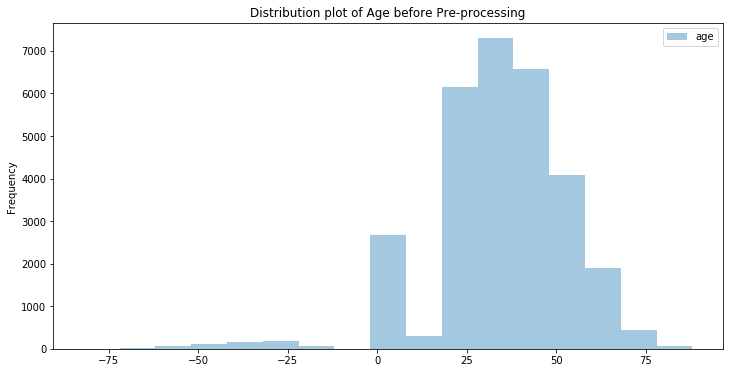

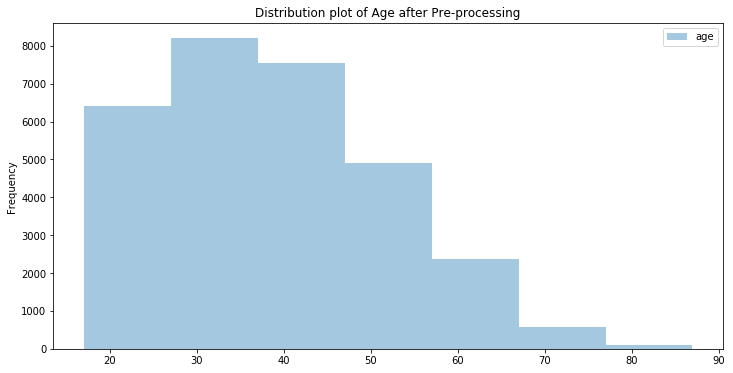

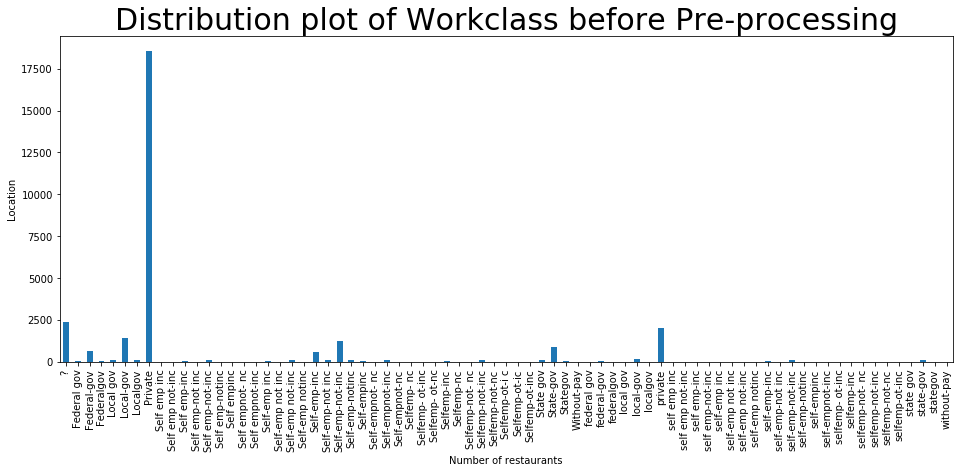

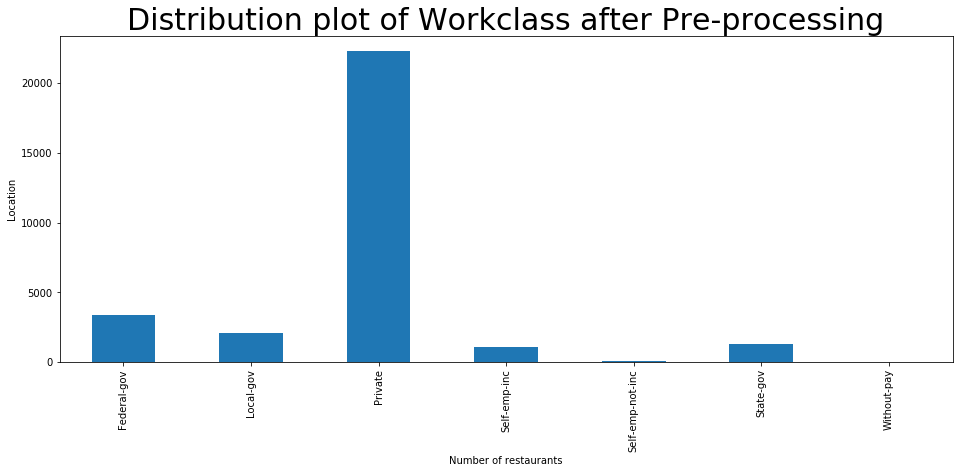

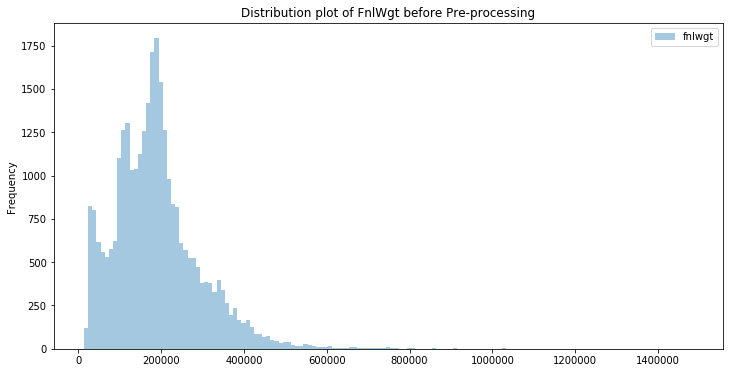

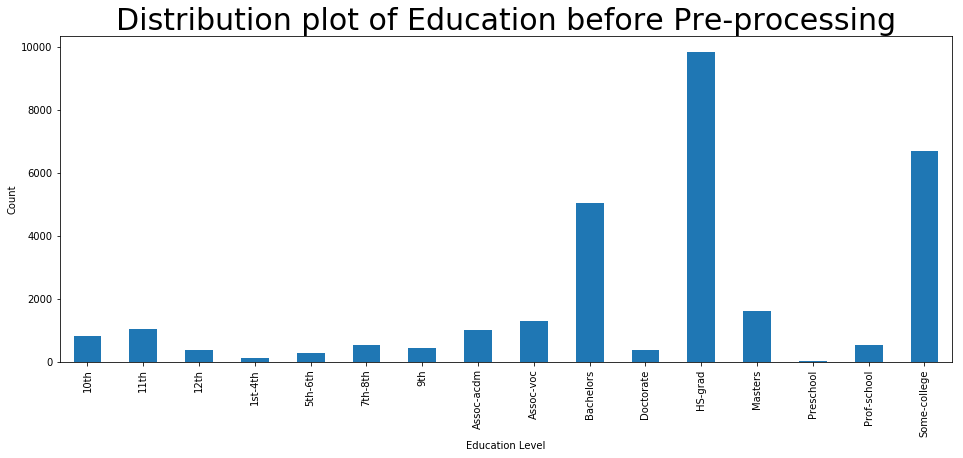

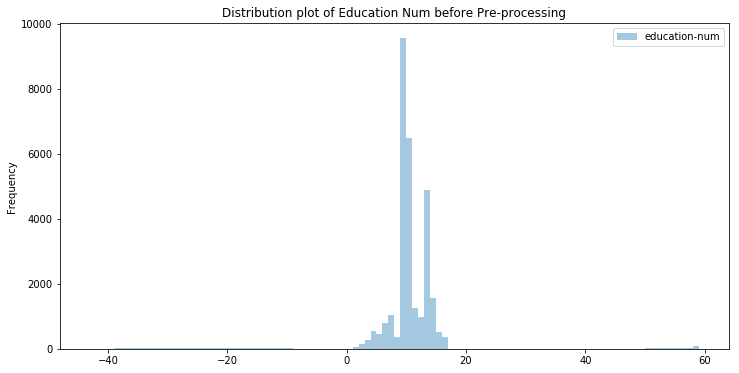

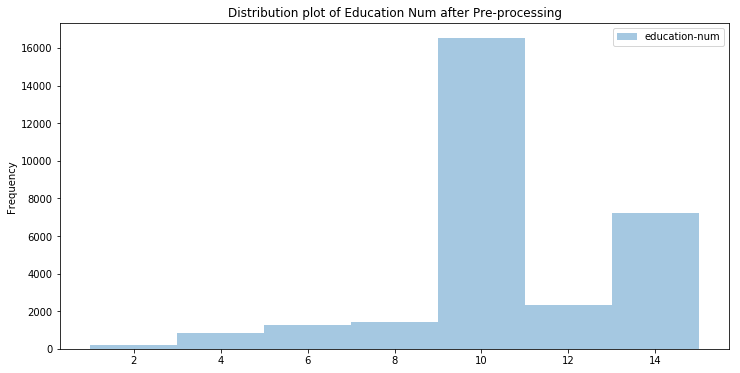

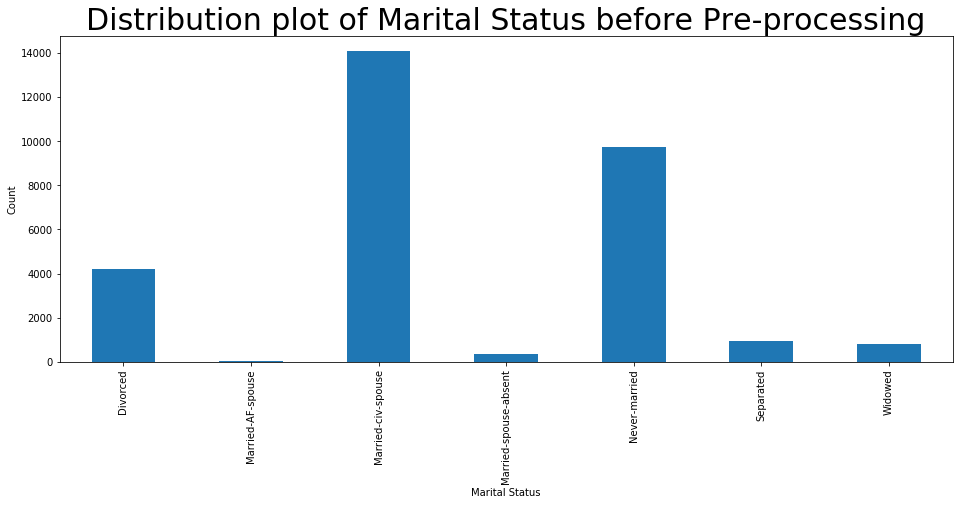

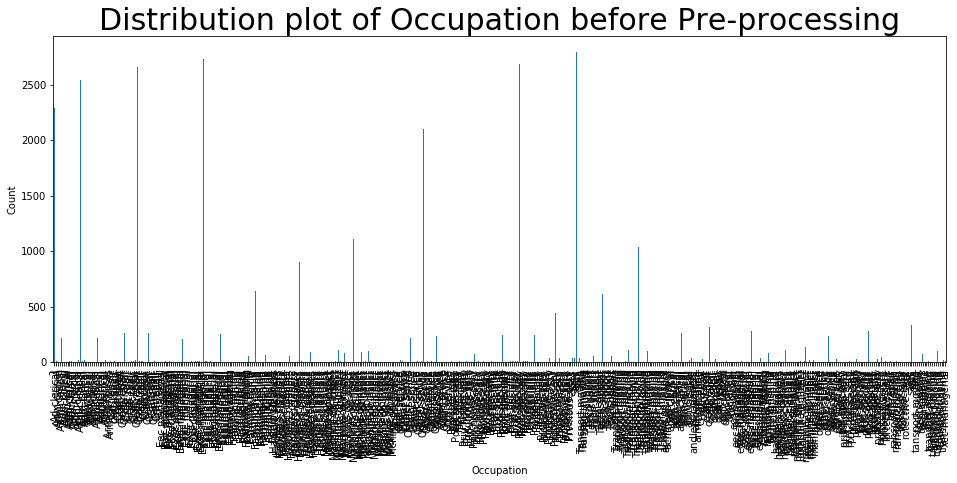

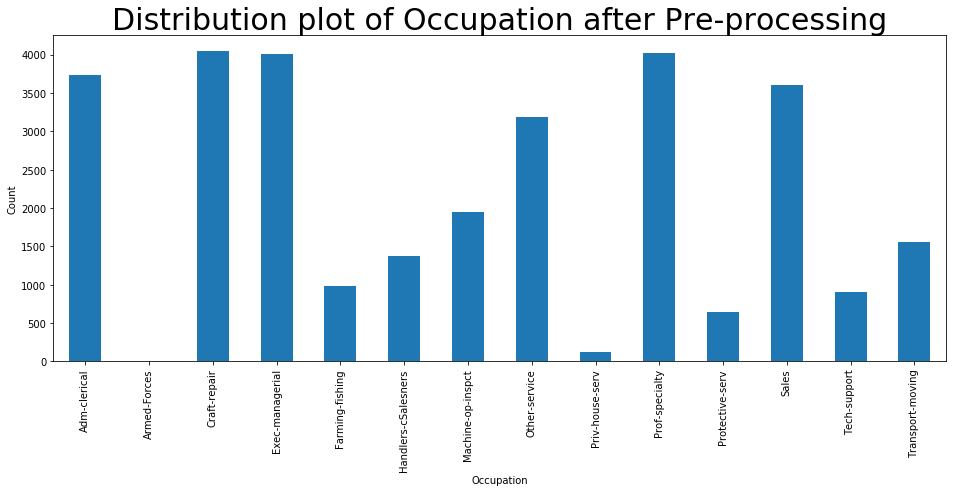

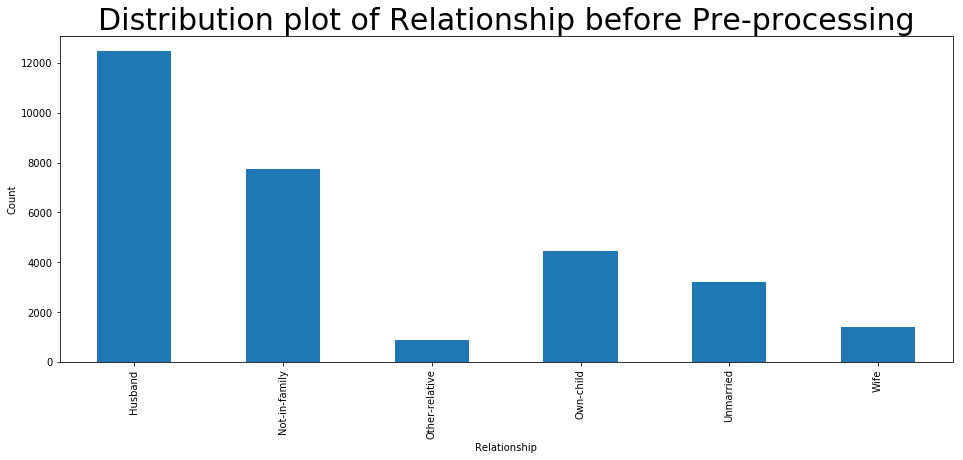

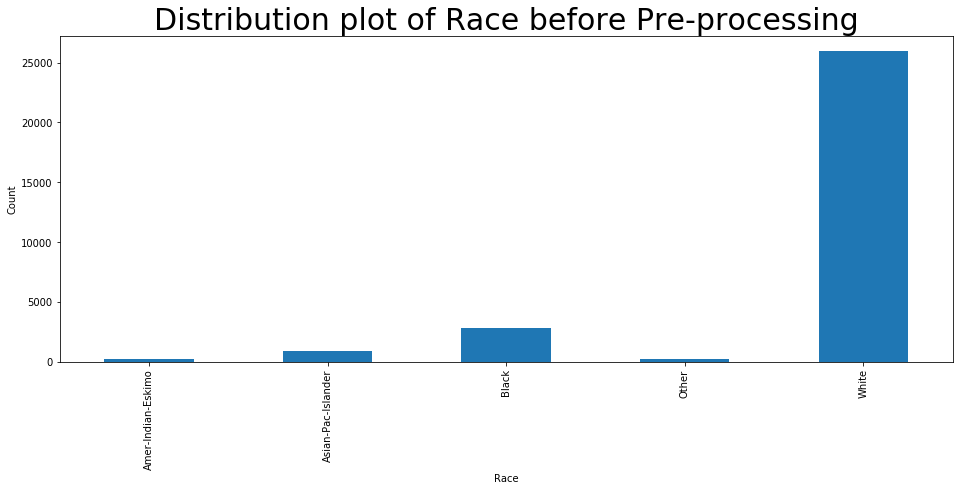

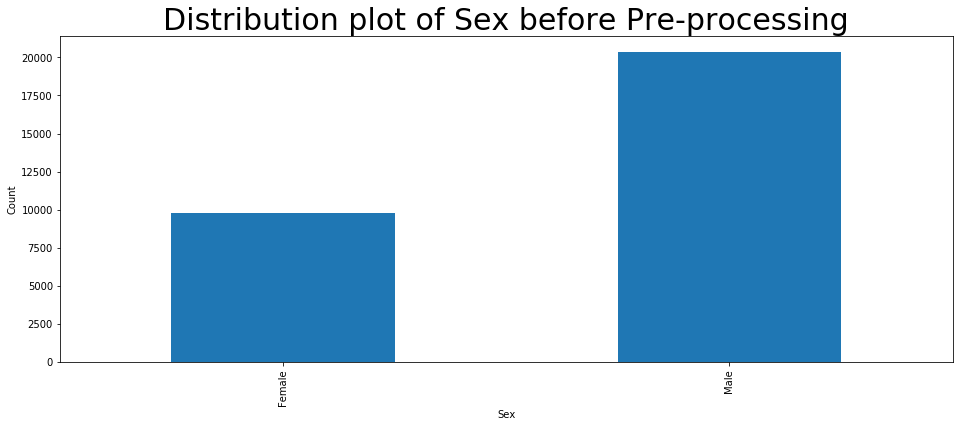

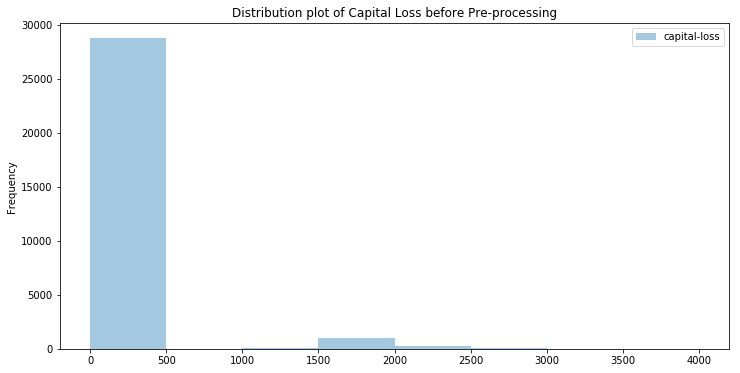

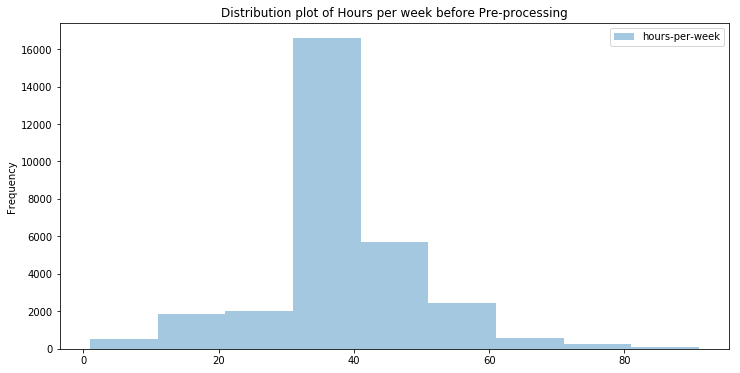

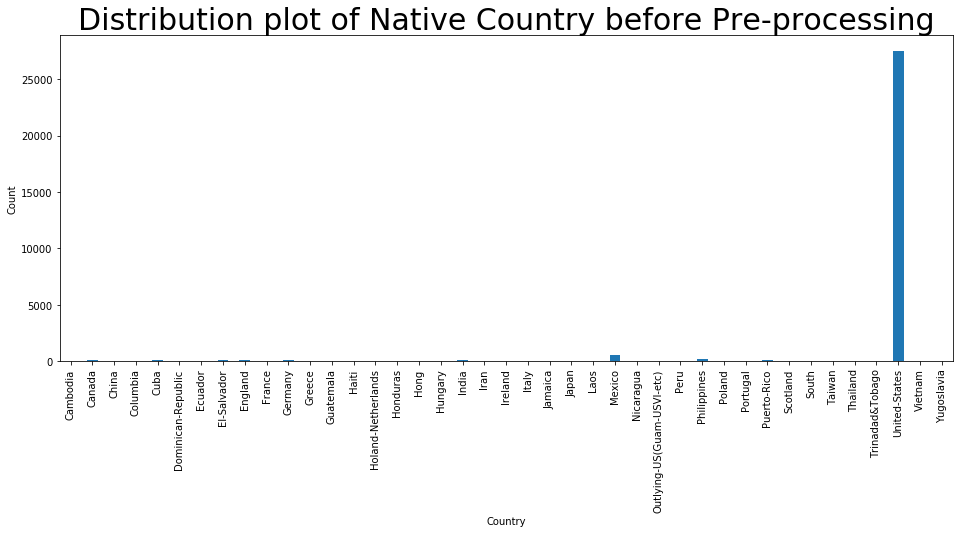

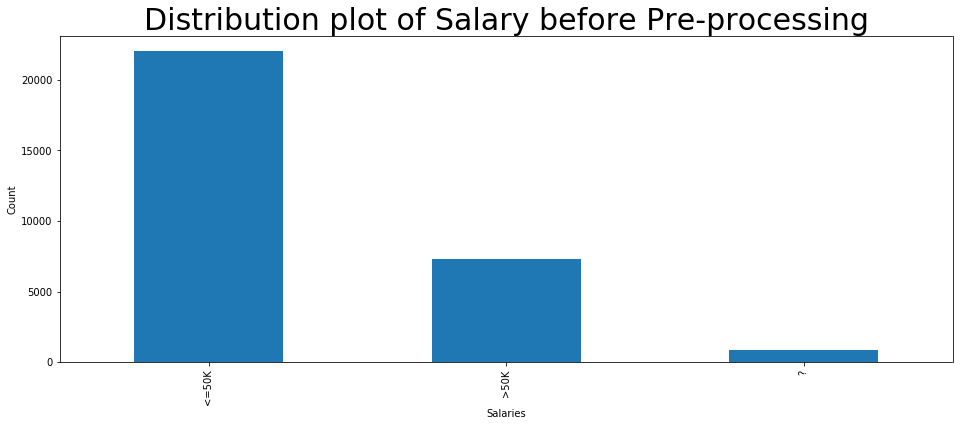

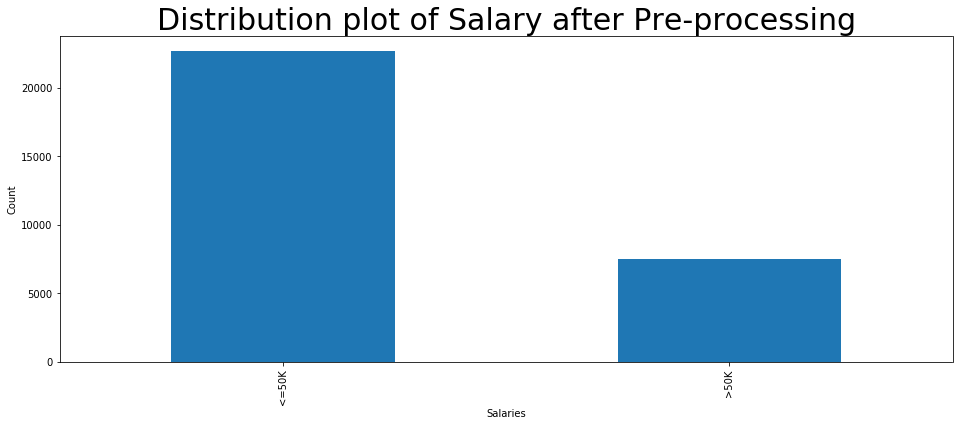

In [206]:
if __name__ == "__main__":
    main()